<a href="https://colab.research.google.com/github/kourosh89/Preprocessing/blob/main/Github_Classic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Hotel Reservations.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Before start checking and cleaning data, we should take care of some features.
total features are 18 and they are a lot. by getting advice from the person who working in the hotel, we selected just 8 features

In [ ]:
df = df[['no_of_adults','room_type_reserved','lead_time','arrival_month','market_segment_type','no_of_previous_cancellations','avg_price_per_room','no_of_special_requests','booking_status']]

In [ ]:
df.head()

,no_of_adults,room_type_reserved,lead_time,arrival_month,market_segment_type,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,Room_Type 1,224,10,Offline,0,65.00,0,Not_Canceled
1,2,Room_Type 1,5,11,Online,0,106.68,1,Not_Canceled
2,1,Room_Type 1,1,2,Online,0,60.00,0,Canceled
3,2,Room_Type 1,211,5,Online,0,100.00,0,Canceled
4,2,Room_Type 1,48,4,Online,0,94.50,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_adults                  36275 non-null  int64  
 1   room_type_reserved            36275 non-null  object 
 2   lead_time                     36275 non-null  int64  
 3   arrival_month                 36275 non-null  int64  
 4   market_segment_type           36275 non-null  object 
 5   no_of_previous_cancellations  36275 non-null  int64  
 6   avg_price_per_room            36275 non-null  float64
 7   no_of_special_requests        36275 non-null  int64  
 8   booking_status                36275 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.5+ MB


In [ ]:
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['booking_status'] = df['booking_status'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_adults                  36275 non-null  int64   
 1   room_type_reserved            36275 non-null  category
 2   lead_time                     36275 non-null  int64   
 3   arrival_month                 36275 non-null  category
 4   market_segment_type           36275 non-null  category
 5   no_of_previous_cancellations  36275 non-null  int64   
 6   avg_price_per_room            36275 non-null  float64 
 7   no_of_special_requests        36275 non-null  int64   
 8   booking_status                36275 non-null  category
dtypes: category(4), float64(1), int64(4)
memory usage: 1.5 MB


In [ ]:
code_room_type_reserved = dict(enumerate(np.unique(df['room_type_reserved'])))
code_arrival_month = dict(enumerate(np.unique(df['arrival_month'])))
code_market_segment_type = dict(enumerate(np.unique(df['market_segment_type'])))
code_booking_status = dict(enumerate(np.unique(df['booking_status'])))
print(code_room_type_reserved)

{0: 'Room_Type 1', 1: 'Room_Type 2', 2: 'Room_Type 3', 3: 'Room_Type 4', 4: 'Room_Type 5', 5: 'Room_Type 6', 6: 'Room_Type 7'}


In [ ]:
mklabel = LabelEncoder()
df['room_type_reserved']=mklabel.fit_transform(df['room_type_reserved'])
df['arrival_month']=mklabel.fit_transform(df['arrival_month'])
df['market_segment_type']=mklabel.fit_transform(df['market_segment_type'])
df['booking_status']=mklabel.fit_transform(df['booking_status'])

In [ ]:
np.unique(df['room_type_reserved'])

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df.head(3)

,no_of_adults,room_type_reserved,lead_time,arrival_month,market_segment_type,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,224,9,3,0,65.00,0,1
1,2,0,5,10,4,0,106.68,1,1
2,1,0,1,1,4,0,60.00,0,0


Beacuse of the categorical columns have been changed to int, we are going to change them to categorical again

In [ ]:
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['booking_status'] = df['booking_status'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   no_of_adults                  36275 non-null  int64   
 1   room_type_reserved            36275 non-null  category
 2   lead_time                     36275 non-null  int64   
 3   arrival_month                 36275 non-null  category
 4   market_segment_type           36275 non-null  category
 5   no_of_previous_cancellations  36275 non-null  int64   
 6   avg_price_per_room            36275 non-null  float64 
 7   no_of_special_requests        36275 non-null  int64   
 8   booking_status                36275 non-null  category
dtypes: category(4), float64(1), int64(4)
memory usage: 1.5 MB


In [ ]:
x = df.loc[:,'no_of_adults':'no_of_special_requests']
y = df['booking_status']

In [ ]:
x.head()

,no_of_adults,room_type_reserved,lead_time,arrival_month,market_segment_type,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
0,2,0,224,9,3,0,65.00,0
1,2,0,5,10,4,0,106.68,1
2,1,0,1,1,4,0,60.00,0
3,2,0,211,4,4,0,100.00,0
4,2,0,48,3,4,0,94.50,0


In this step we need to analysis correlation between all variables

In [ ]:
x.corr()

,no_of_adults,lead_time,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,0.097287,-0.047426,0.296886,0.189401
lead_time,0.097287,1.000000,-0.045723,-0.062596,-0.101645
no_of_previous_cancellations,-0.047426,-0.045723,1.000000,-0.063340,-0.003317
avg_price_per_room,0.296886,-0.062596,-0.063340,1.000000,0.184381
no_of_special_requests,0.189401,-0.101645,-0.003317,0.184381,1.000000


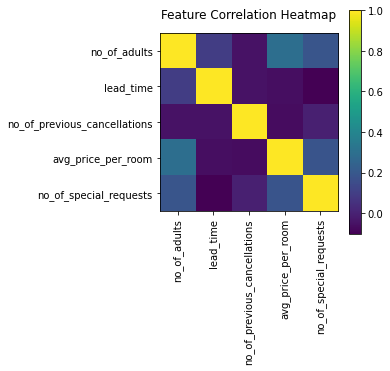

In [ ]:
plt.matshow(x.corr())
plt.xticks(range(x.corr().shape[1]) , x.corr().columns , rotation = 90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(x.corr().shape[1]) , x.corr().columns)
plt.colorbar()
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()

As we see in the Heatmap, there is no big correlation between any two variables. which is why, we do not need to remove any variable

At this time, we are going to analysis distribution of any numerical variable

In [ ]:
categorical_name = ['room_type_reserved','arrival_month','market_segment_type']

In [ ]:
numeric_name = x.corr().index
numeric_name

Index(['no_of_adults', 'lead_time', 'no_of_previous_cancellations',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

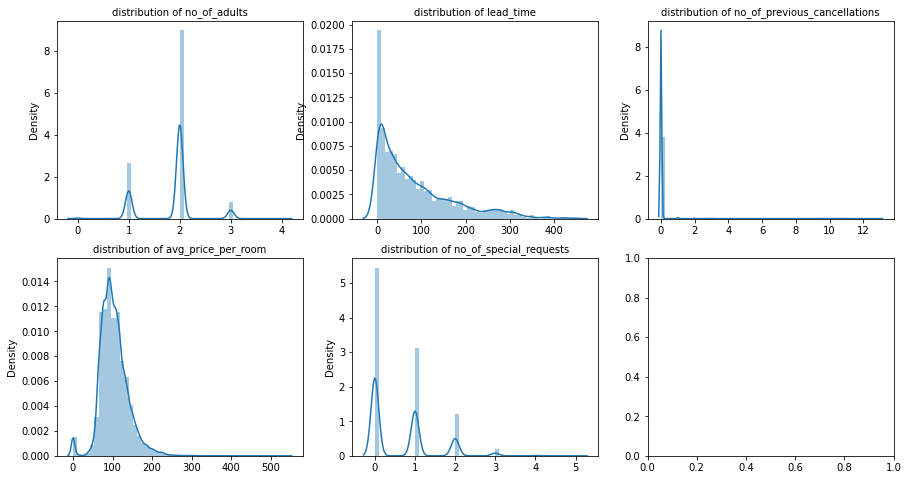

In [ ]:
fig , ax = plt.subplots(nrows=2,ncols=3,figsize=[15,8])
for i in range(3):
  sb.distplot(x=df[numeric_name[i]],ax=ax[0,i])
  ax[0,i].set_title('distribution of '+numeric_name[i],size=10)
for i in range(2):
  sb.distplot(x=df[numeric_name[i+3]],ax=ax[1,i])
  ax[1,i].set_title('distribution of '+numeric_name[i+3],size=10)
plt.show()

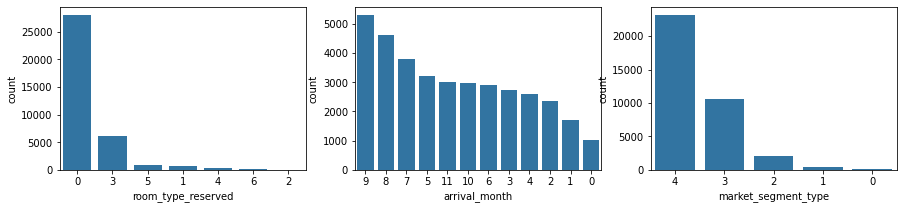

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=3,figsize=[15,3])
for i in range(3):
  sb.countplot(data=df , x=categorical_name[i],ax = ax[i] , color=sb.color_palette()[0] , order=df[categorical_name[i]].value_counts().index)

in this part, we need to divide data in two parts: training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x.values,y.values,test_size=0.3,random_state=42,stratify=y.values)

In [ ]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(25392, 8)
